In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **1. Dataset**

# 1.1 Profiling

In [2]:
ls ../input/ifsp-d3apl-2023-face-recognition/train/train/

'Adam Sandler'/       'Faith Hill'/            'Meg Ryan'/
'Alec Baldwin'/       'George Clooney'/        'Meryl Streep'/
'Angelina Jolie'/     'Gordon Brown'/          'Michael Bloomberg'/
'Anna Kournikova'/    'Gwyneth Paltrow'/       'Mickey Rourke'/
'Ashton Kutcher'/     'Halle Berry'/           'Miley Cyrus'/
'Avril Lavigne'/      'Harrison Ford'/         'Morgan Freeman'/
'Barack Obama'/       'Hugh Jackman'/          'Nicole Kidman'/
'Ben Affleck'/        'Hugh Laurie'/           'Nicole Richie'/
'Beyonce Knowles'/    'Jack Nicholson'/        'Orlando Bloom'/
'Brad Pitt'/          'Jennifer Aniston'/      'Reese Witherspoon'/
'Cameron Diaz'/       'Jennifer Lopez'/        'Renee Zellweger'/
'Cate Blanchett'/     'Jennifer Love Hewitt'/  'Ricky Martin'/
'Charlize Theron'/    'Jessica Alba'/          'Robert Gates'/
'Christina Ricci'/    'Jessica Simpson'/       'Sania Mirza'/
'Claudia Schiffer'/   'Joaquin Phoenix'/       'Scarlett Johansson'/
'Clive Owen'/         'John Travolta

In [3]:
import os

dataset_folder = '../input/ifsp-d3apl-2023-face-recognition/train/train/'

class_folders = sorted(os.listdir(dataset_folder))


print(class_folders)
print(f'Number of class: {len(class_folders)}')

['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie', 'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne', 'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt', 'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron', 'Christina Ricci', 'Claudia Schiffer', 'Clive Owen', 'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo', 'Daniel Craig', 'Daniel Radcliffe', 'David Beckham', 'David Duchovny', 'Denise Richards', 'Drew Barrymore', 'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill', 'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry', 'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson', 'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt', 'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix', 'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss', 'Kate Winslet', 'Katherine Heigl', 'Keira Knightley', 'Kiefer Sutherland', 'Leonardo DiCaprio', 'Lindsay Lohan', 'Mariah Carey', 'Martha Stewart', 'Matt Damon', 'Meg Ryan', 'Meryl Streep', '

In [4]:
# show me the class proportions: number of samples per class
for class_folder in class_folders:
    full_class_folder = os.path.join(dataset_folder, class_folder)
    
    class_img_filenames = os.listdir(full_class_folder)
    print(f'Number of Images for Class "{class_folder}": {len(class_img_filenames)}')

Number of Images for Class "Adam Sandler": 88
Number of Images for Class "Alec Baldwin": 83
Number of Images for Class "Angelina Jolie": 194
Number of Images for Class "Anna Kournikova": 151
Number of Images for Class "Ashton Kutcher": 81
Number of Images for Class "Avril Lavigne": 279
Number of Images for Class "Barack Obama": 249
Number of Images for Class "Ben Affleck": 97
Number of Images for Class "Beyonce Knowles": 106
Number of Images for Class "Brad Pitt": 280
Number of Images for Class "Cameron Diaz": 226
Number of Images for Class "Cate Blanchett": 140
Number of Images for Class "Charlize Theron": 175
Number of Images for Class "Christina Ricci": 123
Number of Images for Class "Claudia Schiffer": 102
Number of Images for Class "Clive Owen": 114
Number of Images for Class "Colin Farrell": 125
Number of Images for Class "Colin Powell": 92
Number of Images for Class "Cristiano Ronaldo": 148
Number of Images for Class "Daniel Craig": 148
Number of Images for Class "Daniel Radclif

In [5]:
import os
import glob

# List of directories
#directories = ['dir1', 'dir2', 'dir3']

# Dictionary to store directory and file count
file_counts = {}

# Count files in each directory
for class_folder in class_folders:
    full_class_folder = os.path.join(dataset_folder, class_folder)
    file_counts[class_folder] = len(glob.glob(os.path.join(full_class_folder, '*')))

# Sort file counts by value in descending order
sorted_counts = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)

print(sorted_counts)

# Print the sorted file counts
#for class_folder, count in sorted_counts:
#    print(f"{class_folder}: {count} files")


[('Miley Cyrus', 348), ('Lindsay Lohan', 334), ('Brad Pitt', 280), ('Jessica Simpson', 280), ('Avril Lavigne', 279), ('Scarlett Johansson', 253), ('Barack Obama', 249), ('Orlando Bloom', 240), ('Katherine Heigl', 237), ('Gwyneth Paltrow', 233), ('Cameron Diaz', 226), ('Daniel Radcliffe', 226), ('Jennifer Aniston', 210), ('George Clooney', 207), ('Angelina Jolie', 194), ('Meg Ryan', 190), ('Sharon Stone', 186), ('Shakira', 181), ('Denise Richards', 180), ('Leonardo DiCaprio', 179), ('Tom Cruise', 177), ('Charlize Theron', 175), ('Keira Knightley', 175), ('Zac Efron', 173), ('Nicole Richie', 168), ('David Beckham', 167), ('Nicole Kidman', 165), ('Jessica Alba', 155), ('Anna Kournikova', 151), ('Cristiano Ronaldo', 148), ('Daniel Craig', 148), ('Hugh Laurie', 148), ('Uma Thurman', 147), ('Steve Carell', 146), ('Cate Blanchett', 140), ('Hugh Jackman', 137), ('Reese Witherspoon', 137), ('Matt Damon', 134), ('Kate Moss', 133), ('Drew Barrymore', 132), ('Shahrukh Khan', 132), ('Harrison Ford'

# 1.2 Duplicate the training data folder for oversampling

In [6]:
import shutil
# Set the paths for the input and output directories
input_dir = dataset_folder
data_dir = '../working/oversampled'

# Duplicate the entire folder
shutil.copytree(input_dir, data_dir)


'../working/oversampled'

In [7]:
import os
import glob

# List of directories
#directories = ['dir1', 'dir2', 'dir3']

# Dictionary to store directory and file count
file_counts = {}

class_folders = sorted(os.listdir(data_dir))

# Count files in each directory
for class_folder in class_folders:
    full_class_folder = os.path.join(data_dir, class_folder)
    file_counts[class_folder] = len(glob.glob(os.path.join(full_class_folder, '*')))

# Sort file counts by value in descending order
sorted_counts = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)

print(sorted_counts)


[('Miley Cyrus', 348), ('Lindsay Lohan', 334), ('Brad Pitt', 280), ('Jessica Simpson', 280), ('Avril Lavigne', 279), ('Scarlett Johansson', 253), ('Barack Obama', 249), ('Orlando Bloom', 240), ('Katherine Heigl', 237), ('Gwyneth Paltrow', 233), ('Cameron Diaz', 226), ('Daniel Radcliffe', 226), ('Jennifer Aniston', 210), ('George Clooney', 207), ('Angelina Jolie', 194), ('Meg Ryan', 190), ('Sharon Stone', 186), ('Shakira', 181), ('Denise Richards', 180), ('Leonardo DiCaprio', 179), ('Tom Cruise', 177), ('Charlize Theron', 175), ('Keira Knightley', 175), ('Zac Efron', 173), ('Nicole Richie', 168), ('David Beckham', 167), ('Nicole Kidman', 165), ('Jessica Alba', 155), ('Anna Kournikova', 151), ('Cristiano Ronaldo', 148), ('Daniel Craig', 148), ('Hugh Laurie', 148), ('Uma Thurman', 147), ('Steve Carell', 146), ('Cate Blanchett', 140), ('Hugh Jackman', 137), ('Reese Witherspoon', 137), ('Matt Damon', 134), ('Kate Moss', 133), ('Drew Barrymore', 132), ('Shahrukh Khan', 132), ('Harrison Ford'

In [8]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from PIL import Image 
import PIL 

# Set the desired number of samples per class
desired_samples = 80

# Create an instance of the ImageDataGenerator
data_generator = ImageDataGenerator(
    #rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=40,  # Randomly rotate images within the range of 20 degrees
    #width_shift_range=0.1,  # Randomly shift the width of images by 10%
    #height_shift_range=0.1,  # Randomly shift the height of images by 10%
    shear_range=0.35,  # Apply random shear transformations
    zoom_range=0.35,  # Apply random zoom transformations
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill any newly created pixels after rotation or shifting
)

# Iterate through the folders representing each class
for class_folder in os.listdir(data_dir):
    class_folder_path = os.path.join(data_dir, class_folder)
    
    if os.path.isdir(class_folder_path):
        # Get the list of images in the current class folder
        images = os.listdir(class_folder_path)
        
        # Calculate the number of existing samples in the class
        existing_samples = len(images)
        
        if existing_samples < desired_samples:
            # Calculate the number of additional samples needed
            additional_samples = desired_samples - existing_samples
            
            # Randomly select images from the existing samples
            #selected_images = random.sample(images, additional_samples)
            
            # Create a data generator for the current class folder
            generator = data_generator.flow_from_directory(
                directory=data_dir,
                target_size=(100, 100),  # Adjust the target size as per your requirements
                batch_size=1,
                class_mode='categorical',
                classes=[class_folder],
                shuffle=True,
                save_to_dir=class_folder_path, 
                save_prefix='aug-',
                save_format='jpg'
            )
            
            # Generate additional samples using the data generator
            for i in range(additional_samples):
                batch = next(generator)
                imagem = batch[0]
                


/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [9]:
import os
import glob

# List of directories
#directories = ['dir1', 'dir2', 'dir3']

# Dictionary to store directory and file count
file_counts = {}

class_folders = sorted(os.listdir(data_dir))

# Count files in each directory
for class_folder in class_folders:
    full_class_folder = os.path.join(data_dir, class_folder)
    file_counts[class_folder] = len(glob.glob(os.path.join(full_class_folder, '*')))

# Sort file counts by value in descending order
sorted_counts = sorted(file_counts.items(), key=lambda x: x[1], reverse=True)

print(sorted_counts)

[('Miley Cyrus', 348), ('Lindsay Lohan', 334), ('Brad Pitt', 280), ('Jessica Simpson', 280), ('Avril Lavigne', 279), ('Scarlett Johansson', 253), ('Barack Obama', 249), ('Orlando Bloom', 240), ('Katherine Heigl', 237), ('Gwyneth Paltrow', 233), ('Cameron Diaz', 226), ('Daniel Radcliffe', 226), ('Jennifer Aniston', 210), ('George Clooney', 207), ('Angelina Jolie', 194), ('Meg Ryan', 190), ('Sharon Stone', 186), ('Shakira', 181), ('Denise Richards', 180), ('Leonardo DiCaprio', 179), ('Tom Cruise', 177), ('Charlize Theron', 175), ('Keira Knightley', 175), ('Zac Efron', 173), ('Nicole Richie', 168), ('David Beckham', 167), ('Nicole Kidman', 165), ('Jessica Alba', 155), ('Anna Kournikova', 151), ('Cristiano Ronaldo', 148), ('Daniel Craig', 148), ('Hugh Laurie', 148), ('Uma Thurman', 147), ('Steve Carell', 146), ('Cate Blanchett', 140), ('Hugh Jackman', 137), ('Reese Witherspoon', 137), ('Matt Damon', 134), ('Kate Moss', 133), ('Drew Barrymore', 132), ('Shahrukh Khan', 132), ('Harrison Ford'

In [10]:
#import shutil
#shutil.make_archive(data_dir, 'zip', '../working','oversampled')

# 1.3 Preprocessing the dataset

In [11]:
max_n_samples_per_class = 60

In [12]:
import random
import os

data_dir = '../working/oversampled'
dataset_folder = data_dir
class_folders = sorted(os.listdir(dataset_folder))

# OPTIONAL: just to get the same selected images
random.seed(22)

img_full_paths = []
img_classes = []

for class_folder in class_folders:
    img_class = class_folder  # english
    print(f'Class: {img_class}')  # italiano
    
    # translated class
    #img_class = translate[class_folder]  # english
    #print(f'Translation: {img_class}')  # italiano
    
    # get the full class folder pathname
    full_class_folder = os.path.join(dataset_folder, class_folder)
    print(full_class_folder)
    
    # get all image filenames (without their parent dir) for the current class/animal
    class_img_filenames = sorted(os.listdir(full_class_folder))
    print(len(class_img_filenames))
    
    #### undersampling from scratch
    ### one possible strategy to select `max_n_samples_per_class` of samples randomly
    # random.shuffle(class_img_filenames)
    # class_img_filenames = class_img_filenames[:max_n_samples_per_class]

    class_img_filenames = random.sample(class_img_filenames, max_n_samples_per_class)
    print(f'Number of images: {len(class_img_filenames)}')
    
    for img_filename in class_img_filenames:
        full_img_path = os.path.join(full_class_folder, img_filename)
        
        img_full_paths.append(full_img_path)
        img_classes.append(img_class)
    
    print()

Class: Adam Sandler
../working/oversampled/Adam Sandler
88
Number of images: 60

Class: Alec Baldwin
../working/oversampled/Alec Baldwin
83
Number of images: 60

Class: Angelina Jolie
../working/oversampled/Angelina Jolie
194
Number of images: 60

Class: Anna Kournikova
../working/oversampled/Anna Kournikova
151
Number of images: 60

Class: Ashton Kutcher
../working/oversampled/Ashton Kutcher
81
Number of images: 60

Class: Avril Lavigne
../working/oversampled/Avril Lavigne
279
Number of images: 60

Class: Barack Obama
../working/oversampled/Barack Obama
249
Number of images: 60

Class: Ben Affleck
../working/oversampled/Ben Affleck
97
Number of images: 60

Class: Beyonce Knowles
../working/oversampled/Beyonce Knowles
106
Number of images: 60

Class: Brad Pitt
../working/oversampled/Brad Pitt
280
Number of images: 60

Class: Cameron Diaz
../working/oversampled/Cameron Diaz
226
Number of images: 60

Class: Cate Blanchett
../working/oversampled/Cate Blanchett
140
Number of images: 60

Cl

In [13]:
print(len(img_full_paths))

4980


In [14]:
print(len(img_classes))

4980


In [15]:
# creating a dataframe to store the image full pathnames and their corresponding classes
import pandas as pd

dataset_df = pd.DataFrame({
    'image_pathname': img_full_paths,
    'class': img_classes
})

dataset_df

,image_pathname,class
0,../working/oversampled/Adam Sandler/17.jpg,Adam Sandler
1,../working/oversampled/Adam Sandler/21.jpg,Adam Sandler
2,../working/oversampled/Adam Sandler/116.jpg,Adam Sandler
3,../working/oversampled/Adam Sandler/7.jpg,Adam Sandler
4,../working/oversampled/Adam Sandler/303.jpg,Adam Sandler
...,...,...
4975,../working/oversampled/Zac Efron/47.jpg,Zac Efron
4976,../working/oversampled/Zac Efron/432.jpg,Zac Efron
4977,../working/oversampled/Zac Efron/405.jpg,Zac Efron
4978,../working/oversampled/Zac Efron/462.jpg,Zac Efron


In [16]:
dataset_df['class'].value_counts()

Adam Sandler         60
Nicole Kidman        60
Miley Cyrus          60
Mickey Rourke        60
Michael Bloomberg    60
                     ..
Ehud Olmert          60
Dustin Hoffman       60
Drew Barrymore       60
Denise Richards      60
Zac Efron            60
Name: class, Length: 83, dtype: int64

# 1.4 Saving the preprocessed dataset

In [17]:
dataset_df.to_csv('../working/faces_dataset_oversampled.csv', index=False)

# 1.5 Inspecting an image

In [18]:
import cv2

In [19]:
dataset_df.loc[0, 'image_pathname']

'../working/oversampled/Adam Sandler/17.jpg'

In [20]:
# read an image
img = cv2.imread(dataset_df.loc[0, 'image_pathname'])
print(type(img))
img.shape

<class 'numpy.ndarray'>


(100, 100, 3)

In [21]:
# channel BLUE
img[:, :, 0]

array([[13, 12, 10, ...,  4,  1,  0],
       [12, 14, 14, ...,  4,  1,  0],
       [15, 16, 16, ...,  4,  1,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [22]:
# channel GREEN
img[:, :, 1]

array([[16, 15, 13, ...,  2,  1,  0],
       [15, 17, 17, ...,  2,  1,  0],
       [18, 20, 19, ...,  2,  1,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [23]:
# channel RED
img[:, :, 2]

array([[21, 20, 18, ...,  2,  1,  0],
       [20, 21, 22, ...,  2,  1,  0],
       [22, 21, 23, ...,  2,  1,  0],
       ...,
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=uint8)

In [24]:
img.min(), img.max()

(0, 225)

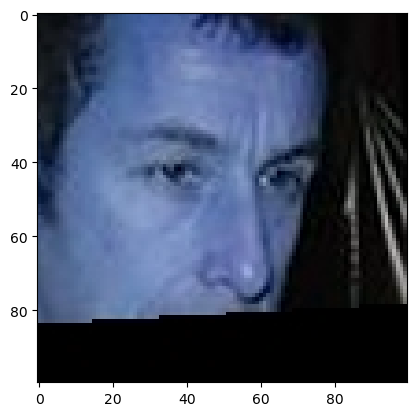

In [25]:
import matplotlib.pyplot as plt

plt.imshow(img)

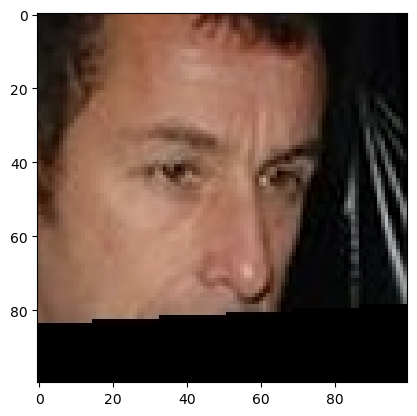

In [26]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_RGB = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.imshow(img_RGB)

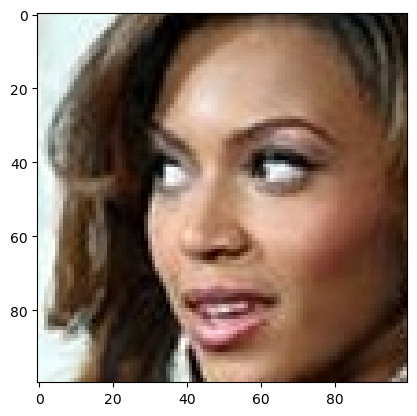

In [27]:
img = cv2.imread(dataset_df.loc[500, 'image_pathname'])  # BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert BGR to RGB
plt.imshow(img)

In [28]:
img.shape

(100, 100, 3)

# 1.6 Create the training dataset

In [29]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [30]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [31]:
gpus = tf.config.list_physical_devices('GPU')

if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [32]:
dataset_df

,image_pathname,class
0,../working/oversampled/Adam Sandler/17.jpg,Adam Sandler
1,../working/oversampled/Adam Sandler/21.jpg,Adam Sandler
2,../working/oversampled/Adam Sandler/116.jpg,Adam Sandler
3,../working/oversampled/Adam Sandler/7.jpg,Adam Sandler
4,../working/oversampled/Adam Sandler/303.jpg,Adam Sandler
...,...,...
4975,../working/oversampled/Zac Efron/47.jpg,Zac Efron
4976,../working/oversampled/Zac Efron/432.jpg,Zac Efron
4977,../working/oversampled/Zac Efron/405.jpg,Zac Efron
4978,../working/oversampled/Zac Efron/462.jpg,Zac Efron


In [33]:
dataset_df["class"].unique()

array(['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie',
       'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne',
       'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt',
       'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron',
       'Christina Ricci', 'Claudia Schiffer', 'Clive Owen',
       'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo',
       'Daniel Craig', 'Daniel Radcliffe', 'David Beckham',
       'David Duchovny', 'Denise Richards', 'Drew Barrymore',
       'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill',
       'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry',
       'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson',
       'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt',
       'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix',
       'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss',
       'Kate Winslet', 'Katherine Heigl', 'Keira Knightley',
       'Kiefer Sutherland', 'Leo

In [34]:
class_names = sorted(dataset_df["class"].unique())
n_classes = len(class_names)

print(f'Number of classes: {n_classes}')
print(f'Classes: {class_names}')

Number of classes: 83
Classes: ['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie', 'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne', 'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt', 'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron', 'Christina Ricci', 'Claudia Schiffer', 'Clive Owen', 'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo', 'Daniel Craig', 'Daniel Radcliffe', 'David Beckham', 'David Duchovny', 'Denise Richards', 'Drew Barrymore', 'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill', 'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry', 'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson', 'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt', 'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix', 'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss', 'Kate Winslet', 'Katherine Heigl', 'Keira Knightley', 'Kiefer Sutherland', 'Leonardo DiCaprio', 'Lindsay Lohan', 'Mariah Carey', 'Martha Stewart', 'Matt Damon'

In [35]:
# number of samples per class
dataset_df['class'].value_counts()

Adam Sandler         60
Nicole Kidman        60
Miley Cyrus          60
Mickey Rourke        60
Michael Bloomberg    60
                     ..
Ehud Olmert          60
Dustin Hoffman       60
Drew Barrymore       60
Denise Richards      60
Zac Efron            60
Name: class, Length: 83, dtype: int64

In [36]:
from sklearn.model_selection import train_test_split

# for a stratified sampling, we need to pass the labels
labels = dataset_df['class']

dataset_df_full_train, dataset_df_test = train_test_split(dataset_df, test_size=0.2, random_state=22, stratify=labels)

In [37]:
dataset_df_full_train.shape

(3984, 2)

In [38]:
dataset_df_full_train.head()

,image_pathname,class
2668,../working/oversampled/Julia Roberts/286.jpg,Julia Roberts
3569,../working/oversampled/Mickey Rourke/7.jpg,Mickey Rourke
2,../working/oversampled/Adam Sandler/116.jpg,Adam Sandler
150,../working/oversampled/Angelina Jolie/657.jpg,Angelina Jolie
4186,../working/oversampled/Sania Mirza/168.jpg,Sania Mirza


In [39]:
dataset_df_test.shape

(996, 2)

In [40]:
# for a stratified sampling, we need to pass the labels
labels_full_train = dataset_df_full_train['class']
#labels = dataset_df['class']

dataset_df_train, dataset_df_val = train_test_split(dataset_df_full_train, train_size=0.8, random_state=22, stratify=labels_full_train)
#dataset_df_train, dataset_df_val = train_test_split(dataset_df, train_size=0.8, random_state=42, stratify=labels)

dataset_df_train['class'].value_counts()

Uma Thurman          39
Harrison Ford        39
Barack Obama         39
Hugh Laurie          39
Faith Hill           39
                     ..
Beyonce Knowles      38
Reese Witherspoon    38
Claudia Schiffer     38
Avril Lavigne        38
Gordon Brown         38
Name: class, Length: 83, dtype: int64

In [41]:
# checking class balancing in the validation set
dataset_df_val['class'].value_counts()

Ben Affleck          10
Eva Mendes           10
Reese Witherspoon    10
John Travolta        10
Katherine Heigl      10
                     ..
Jack Nicholson        9
Gwyneth Paltrow       9
Nicole Richie         9
Steve Carell          9
Dustin Hoffman        9
Name: class, Length: 83, dtype: int64

In [42]:
dataset_df_test['class'].value_counts()

Ashton Kutcher      12
Daniel Radcliffe    12
Dustin Hoffman      12
Halle Berry         12
Gwyneth Paltrow     12
                    ..
Orlando Bloom       12
Kate Winslet        12
Nicole Kidman       12
Keira Knightley     12
Uma Thurman         12
Name: class, Length: 83, dtype: int64

# 1.7 Preprocessing the images

In [43]:
dataset_df.loc[0, 'image_pathname']

'../working/oversampled/Adam Sandler/17.jpg'

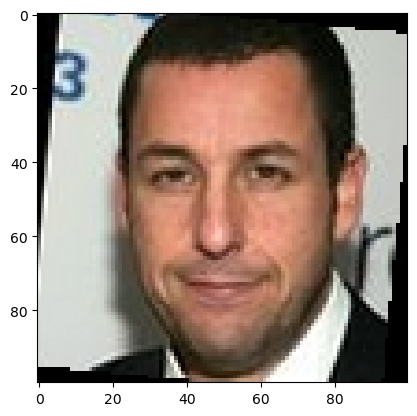

In [44]:
import cv2
import matplotlib.pyplot as plt

# BGR
img = cv2.imread('../working/oversampled/Adam Sandler/73.jpg')
# BGR ==> RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [45]:
# aspect ratio = width / height
aspect_ratio = img.shape[0] / img.shape[1]
aspect_ratio

1.0

In [46]:
import cv2
from sklearn.preprocessing import LabelEncoder
import numpy as np


#def preprocess_faces_dataset(dataset_df, label_encoder: LabelEncoder, new_img_dims=(100, 100), verbose=0):
def preprocess_faces_dataset(dataset_df, label_encoder: LabelEncoder, new_img_dims=(224, 224), verbose=0):
    # load the images as a feature matrix
    image_list = []  # list of numpy arrays
    
    for index, img_path in enumerate(dataset_df['image_pathname']):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # image resizing
        # for gray or color images, the linear interpolation sounds good
        img = cv2.resize(img, new_img_dims, interpolation=cv2.INTER_LINEAR)        
        image_list.append(img)
        
        if verbose and (index % verbose) == 0:
            print(f'{index + 1}/{dataset_df.shape[0]} - {img_path}')
    
    # numpy array 4D: n_imgs, height, width, n_channels
    X = np.array(image_list)
    
    # feature scaling
    # numpy arary 4D with values within [0, 1]
    X = X / 255.0
    
    # encoding the classes
    # numpy array 1D with integer labels
    y = label_encoder.transform(dataset_df['class'])
    
    return X, y

In [47]:
from tensorflow.keras.utils import Sequence
import numpy as np
import math
import cv2


class MyGenerator(Sequence):
    def __init__(self, dataset_df, label_encoder, batch_size, new_dims=(100, 100)):
        self.dataset_df = dataset_df
        self.label_encoder = label_encoder
        self.batch_size = batch_size
        self.new_dims = new_dims
    
    
    def __len__(self):
        n_samples = self.dataset_df.shape[0]
        
        return math.ceil(n_samples / float(self.batch_size))
    
    
    def __getitem__(self, idx):
        batch_begin = idx * self.batch_size
        batch_end = (idx + 1) * self.batch_size
        
        batch_df = self.dataset_df[batch_begin:batch_end]
        
        X_batch, y_batch = preprocess_faces_dataset(batch_df, self.label_encoder, self.new_dims, verbose=0)
        #X_batch, y_batch = preprocess_faces_dataset(batch_df, self.label_encoder, self.new_dims)
                
        return X_batch, y_batch

In [48]:
# training a Label Encoder from the train set
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(dataset_df_train['class'])

label_encoder.classes_

array(['Adam Sandler', 'Alec Baldwin', 'Angelina Jolie',
       'Anna Kournikova', 'Ashton Kutcher', 'Avril Lavigne',
       'Barack Obama', 'Ben Affleck', 'Beyonce Knowles', 'Brad Pitt',
       'Cameron Diaz', 'Cate Blanchett', 'Charlize Theron',
       'Christina Ricci', 'Claudia Schiffer', 'Clive Owen',
       'Colin Farrell', 'Colin Powell', 'Cristiano Ronaldo',
       'Daniel Craig', 'Daniel Radcliffe', 'David Beckham',
       'David Duchovny', 'Denise Richards', 'Drew Barrymore',
       'Dustin Hoffman', 'Ehud Olmert', 'Eva Mendes', 'Faith Hill',
       'George Clooney', 'Gordon Brown', 'Gwyneth Paltrow', 'Halle Berry',
       'Harrison Ford', 'Hugh Jackman', 'Hugh Laurie', 'Jack Nicholson',
       'Jennifer Aniston', 'Jennifer Lopez', 'Jennifer Love Hewitt',
       'Jessica Alba', 'Jessica Simpson', 'Joaquin Phoenix',
       'John Travolta', 'Julia Roberts', 'Julia Stiles', 'Kate Moss',
       'Kate Winslet', 'Katherine Heigl', 'Keira Knightley',
       'Kiefer Sutherland', 'Leo

In [49]:
#batch_size = 83

#training_batch_generator = MyGenerator(dataset_df_train, label_encoder, batch_size, new_dims=(100, 100))
#validation_batch_generator = MyGenerator(dataset_df_val, label_encoder, batch_size, new_dims=(100, 100))
#test_batch_generator = MyGenerator(dataset_df_test, label_encoder, batch_size, new_dims=(100, 100))

In [50]:
#test_batch_generator = MyGenerator(dataset_df_test, label_encoder, batch_size, new_dims=(100, 100))

In [51]:
# transform/map the string class to the trained numeric class
#label_encoder.transform(['Alec Baldwin', 'Claudia Schiffer', 'Zac Efron'])

In [52]:
# preprocessing the train set
#X_train, y_train = preprocess_faces_dataset(dataset_df_train, label_encoder)
#X_train, y_train = preprocess_faces_dataset(dataset_df_train, label_encoder, new_img_dims=(100, 100))
X_train, y_train = preprocess_faces_dataset(dataset_df_train, label_encoder, new_img_dims=(224, 224))

In [53]:
print(f'X_train.shape: {X_train.shape}')
print(f'y_train (classes): {np.unique(y_train)}')
print(f'y_train.shape: {y_train.shape}')

# rescaled 24-bit color image
print(f'Min. value of X_train: {X_train.min()}')
print(f'Max. value of X_train: {X_train.max()}\n')

X_train.shape: (3187, 224, 224, 3)
y_train (classes): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]
y_train.shape: (3187,)
Min. value of X_train: 0.0
Max. value of X_train: 1.0



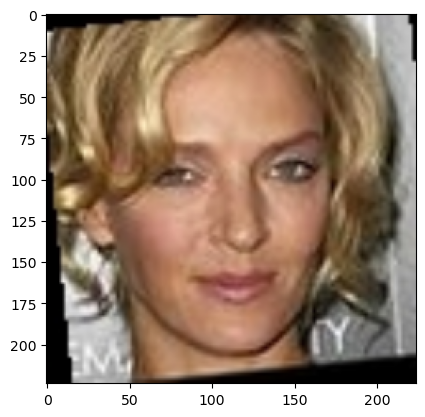

In [54]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [55]:

# preprocessing the validation set
#X_val, y_val = preprocess_faces_dataset(dataset_df_val, label_encoder)
#X_val, y_val = preprocess_faces_dataset(dataset_df_val, label_encoder, new_img_dims=(100, 100))
X_val, y_val = preprocess_faces_dataset(dataset_df_val, label_encoder, new_img_dims=(224, 224))

In [56]:

print(f'X_val.shape: {X_val.shape}')
print(f'y_val (classes): {np.unique(y_val)}')
print(f'y_val.shape: {y_val.shape}')

# rescaled 24-bit color image
print(f'Min. value of X_val: {X_val.min()}')
print(f'Max. value of X_val: {X_val.max()}\n')


X_val.shape: (797, 224, 224, 3)
y_val (classes): [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]
y_val.shape: (797,)
Min. value of X_val: 0.0
Max. value of X_val: 1.0



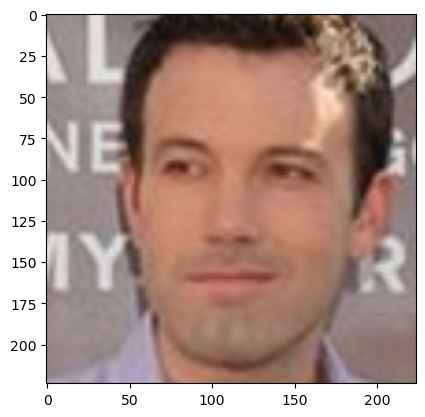

In [57]:
import matplotlib.pyplot as plt
plt.imshow(X_val[0])

In [58]:
# preprocessing the test set
#X_test, y_test = preprocess_faces_dataset(dataset_df_test, label_encoder, new_img_dims=(100, 100))
X_test, y_test = preprocess_faces_dataset(dataset_df_test, label_encoder, new_img_dims=(224, 224))

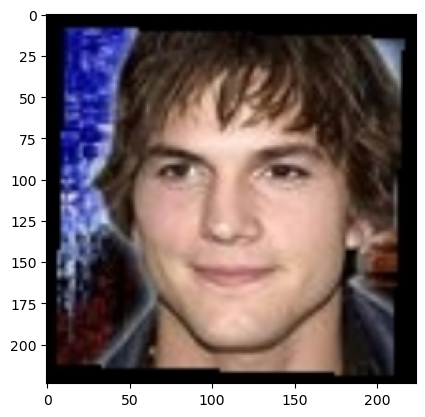

In [59]:
import matplotlib.pyplot as plt
plt.imshow(X_test[0])

# 1.8 Saving the preprocessed data

In [60]:
import os

out_dir = '../working/preprocessed'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
dataset_df_full_train.to_csv(os.path.join(out_dir, 'full_train.csv'), index=False)

dataset_df_train.to_csv(os.path.join(out_dir, 'train.csv'), index=False)
np.save(os.path.join(out_dir, 'train_data_64x64x3.npy'), X_train)
np.save(os.path.join(out_dir, 'train_labels.npy'), y_train)

dataset_df_val.to_csv(os.path.join(out_dir, 'validation.csv'), index=False)
np.save(os.path.join(out_dir, 'validation_data_64x64x3.npy'), X_val)
np.save(os.path.join(out_dir, 'validation_labels.npy'), y_val)

dataset_df_test.to_csv(os.path.join(out_dir, 'test.csv'), index=False)
np.save(os.path.join(out_dir, 'test_data_64x64x3.npy'), X_test)
np.save(os.path.join(out_dir, 'test_labels.npy'), y_test)


# 2 Training the model

# 2.1 Stablish base model for transfer learning VGG16

In [61]:
'''
# https://keras.io/api/applications/vgg/
# https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4

from tensorflow.keras.applications import VGG16

base_model = VGG16(include_top=None,   # we will ignore the top layers that consists of the MLP classifier of VGG16
                   weights="imagenet", # we will use the weights learned for the ImageNet dataset
                   input_shape=(100, 100, 3))  # let's consider a smaller resolution than the original paper due to lack of memory


# freeze the base model weights ==> these weights won't be updated during training
# i.e., the weights of all layers from the base model are not updated
base_model.trainable = False
'''

'\n# https://keras.io/api/applications/vgg/\n# https://towardsdatascience.com/transfer-learning-with-vgg16-and-keras-50ea161580b4\n\nfrom tensorflow.keras.applications import VGG16\n\nbase_model = VGG16(include_top=None,   # we will ignore the top layers that consists of the MLP classifier of VGG16\n                   weights="imagenet", # we will use the weights learned for the ImageNet dataset\n                   input_shape=(100, 100, 3))  # let\'s consider a smaller resolution than the original paper due to lack of memory\n\n\n# freeze the base model weights ==> these weights won\'t be updated during training\n# i.e., the weights of all layers from the base model are not updated\nbase_model.trainable = False\n'

In [62]:
#!pip install keras-vggface
!pip install git+https://github.com/rcmalli/keras-vggface.git
!pip install Keras-Applications

    
filename = "/opt/conda/lib/python3.10/site-packages/keras_vggface/models.py"
text = open(filename).read()
open(filename, "w+").write(text.replace('keras.engine.topology', 'tensorflow.keras.utils'))
import tensorflow as tf

from keras_vggface.vggface import VGGFace
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout



  Cloning https://github.com/rcmalli/keras-vggface.git to /tmp/pip-req-build-zxz51bc7
  Running command git clone --filter=blob:none --quiet https://github.com/rcmalli/keras-vggface.git /tmp/pip-req-build-zxz51bc7
  Resolved https://github.com/rcmalli/keras-vggface.git to commit bee35376e76e35d00aeec503f2f242611a97b38a
  Preparing metadata (setup.py) ... - \ done
  Created wheel for keras-vggface: filename=keras_vggface-0.6-py3-none-any.whl size=8315 sha256=e67d9c8fc57741c95a75139f28e43e31b5703ba2dbe92a178a4f9441053c5f41
  Stored in directory: /tmp/pip-ephem-wheel-cache-z29g923t/wheels/62/cd/e0/3a2d2fe84d014324aed54d420cab52df65a774d9b296c63996
Successfully built keras-vggface
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 4.0 MB/s eta 0:00:00


In [63]:

import tensorflow as tf

from keras_vggface.vggface import VGGFace
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout



#from keras_vggface.vggface import VGGFace

# Based on VGG16 architecture -> old paper(2015)
#vggface = VGGFace(model='vgg16') # or VGGFace() as default

# Based on RESNET50 architecture -> new paper(2017)
vggface = VGGFace(model='resnet50')

# Based on SENET50 architecture -> new paper(2017)
#vggface = VGGFace(model='senet50')


#from keras.engine import  Model
#from keras.layers import Input
#from keras_vggface.vggface import VGGFace

# Convolution Features
#vgg_features = VGGFace(include_top=False, input_shape=(100, 100, 3), pooling='avg') # pooling: None, avg or max
vgg_features = VGGFace(include_top=False, input_shape=(224, 224, 3), pooling='avg') # pooling: None, avg or max

# After this point you can use your model to predict.
# ...

#from keras.engine import  Model
#from keras.layers import Input
#from keras_vggface.vggface import VGGFace

# Layer Features
#layer_name = 'layer_name' # edit this line
#vgg_model = VGGFace() # pooling: None, avg or max
#out = vgg_model.get_layer(layer_name).output
#vgg_model_new = Model(vgg_model.input, out)

# After this point you can use your model to predict.
# ...

#from keras.engine import  Model
#from keras.layers import Flatten, Dense, Input
#from keras_vggface.vggface import VGGFace

#custom parameters
nb_class = 83
hidden_dim = 256

#vgg_model = VGGFace(include_top=False, input_shape=(100, 100, 3))
vgg_model = VGGFace(include_top=False, input_shape=(224, 224, 3))
vgg_model.trainable = False
last_layer = vgg_model.get_layer('pool5').output
x = Flatten(name='flatten')(last_layer)
x = Dense(hidden_dim, activation='relu', name='fc6')(x)
x = Dense(hidden_dim, activation='relu', name='fc7')(x)
x = Dropout(0.5)(x)
out = Dense(nb_class, activation='softmax', name='fc8')(x)
vggface_model = Model(vgg_model.input, out)

# Train your model as usual.
# ...

'''
def define_vggface_model(input_shape, num_classes):
    # Load the VGGFace model
    vggface_model = VGGFace(model='vgg16', weights='vggface', include_top=False, input_shape=input_shape)

    # Freeze the layers of the VGGFace model
    for layer in vggface_model.layers:
       layer.trainable = False

    # Flatten the output of the VGGFace model
    x = Flatten()(vggface_model.output)
    #x = Flatten()(vggface_model.get_layer('avg_pool').output)

    # Add a fully connected layer with dropout
    #x = Dense(1024, activation='relu')(x)
    #x = Dense(512, activation='relu')(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.1)(x)

    # Add the output layer for the desired number of classes
    output = Dense(num_classes, activation='softmax')(x)

    # Create the model
    model = Model(inputs=vggface_model.input, outputs=output)

    return model

# Define the input shape of your images and the number of classes
input_shape = (100, 100, 3)
num_classes = 83

# Create the VGGFace transfer learning model
vggface_model = define_vggface_model(input_shape, num_classes)

'''

# Print a summary of the model architecture
vggface_model.summary()

58909280/58909280 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                              

In [64]:
#base_model = VGGFace(model='vgg16', include_top=None,   # we will ignore the top layers that consists of the MLP classifier of VGG16
                   #weights='vggface', # we will use the weights learned for the ImageNet dataset
                   #input_shape=(100, 100, 3))  # let's consider a smaller resolution than the original paper due to lack of memory

#base_model.trainable = False
#vgg_model.trainable = False

In [65]:
#base_model.summary()

In [66]:
#base_model.summary()

# 2.2 Define the connected model

In [67]:
'''
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation

model = Sequential([
    # our base model - feature extraction
    base_model,

    # data augmentation layers
#        RandomFlip("horizontal"),
#        RandomRotation(factor=0.1),
#        RandomTranslation(height_factor=0.1, width_factor=0.1),
        
        # CNN
#        Conv2D(filters=32, kernel_size=(1,1), activation='relu'),
#        MaxPool2D(pool_size=(1,1)),
#        Conv2D(filters=32, kernel_size=(1,1), activation='relu'),
 #       MaxPool2D(pool_size=(1,1)),
  
    
    Flatten(),
    
    # FC classifier
  Dense(512, activation='relu'),
    # Dense(256, activation='relu'),
 #  Dense(128, activation='relu'),
  #  Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(83, activation='softmax')
])
'''

'\nfrom tensorflow.keras import Sequential\nfrom tensorflow.keras.layers import Flatten, Dense\n\nfrom tensorflow.keras.layers import Conv2D, MaxPool2D\nfrom tensorflow.keras.layers import RandomFlip, RandomRotation, RandomTranslation\n\nmodel = Sequential([\n    # our base model - feature extraction\n    base_model,\n\n    # data augmentation layers\n#        RandomFlip("horizontal"),\n#        RandomRotation(factor=0.1),\n#        RandomTranslation(height_factor=0.1, width_factor=0.1),\n        \n        # CNN\n#        Conv2D(filters=32, kernel_size=(1,1), activation=\'relu\'),\n#        MaxPool2D(pool_size=(1,1)),\n#        Conv2D(filters=32, kernel_size=(1,1), activation=\'relu\'),\n #       MaxPool2D(pool_size=(1,1)),\n  \n    \n    Flatten(),\n    \n    # FC classifier\n  Dense(512, activation=\'relu\'),\n    # Dense(256, activation=\'relu\'),\n #  Dense(128, activation=\'relu\'),\n  #  Dense(64, activation=\'relu\'),\n    Dropout(0.5),\n    Dense(83, activation=\'softmax\')\n])

In [68]:
vggface_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1_1 (Conv2D)            (None, 224, 224, 64)      1792      
                                                                 
 conv1_2 (Conv2D)            (None, 224, 224, 64)      36928     
                                                                 
 pool1 (MaxPooling2D)        (None, 112, 112, 64)      0         
                                                                 
 conv2_1 (Conv2D)            (None, 112, 112, 128)     73856     
                                                                 
 conv2_2 (Conv2D)            (None, 112, 112, 128)     147584    
                                                                 
 pool2 (MaxPooling2D)        (None, 56, 56, 128)       0     

In [69]:
#model.summary()

# 2.3 Compile and run the model

In [70]:
from tensorflow.keras.optimizers import Adam
#opt = Adam(learning_rate=0.001)
opt = Adam(learning_rate=0.0005)
#model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
vggface_model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [71]:
import tensorflow
early_stopping_cb = tensorflow.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

In [72]:
history = vggface_model.fit(X_train, y_train, epochs=20, batch_size=83, validation_data=(X_val, y_val), callbacks=[early_stopping_cb])
# https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit
#history = model.fit(training_batch_generator, epochs=20, validation_data=validation_batch_generator, callbacks=[early_stopping_cb],  use_multiprocessing=True, workers=16, max_queue_size=32)


#history = vggface_model.fit_generator(training_batch_generator, epochs=20, validation_data=validation_batch_generator, callbacks=[early_stopping_cb],  use_multiprocessing=True, workers=16, max_queue_size=32)
                    # Used for generator or keras.utils.Sequence input only
                   

Epoch 1/20
39/39 [==============================] - 27s 418ms/step - loss: 3.9494 - accuracy: 0.1343 - val_loss: 3.0283 - val_accuracy: 0.5646
Epoch 2/20
39/39 [==============================] - 10s 247ms/step - loss: 2.2959 - accuracy: 0.5184 - val_loss: 1.3964 - val_accuracy: 0.8846
Epoch 3/20
39/39 [==============================] - 10s 248ms/step - loss: 1.0645 - accuracy: 0.8073 - val_loss: 0.6994 - val_accuracy: 0.9335
Epoch 4/20
39/39 [==============================] - 10s 247ms/step - loss: 0.5539 - accuracy: 0.9056 - val_loss: 0.4540 - val_accuracy: 0.9486
Epoch 5/20
39/39 [==============================] - 10s 248ms/step - loss: 0.3582 - accuracy: 0.9404 - val_loss: 0.3508 - val_accuracy: 0.9511
Epoch 6/20
39/39 [==============================] - 9s 227ms/step - loss: 0.2255 - accuracy: 0.9724 - val_loss: 0.2872 - val_accuracy: 0.9586
Epoch 7/20
39/39 [==============================] - 10s 252ms/step - loss: 0.1631 - accuracy: 0.9787 - val_loss: 0.2579 - val_accuracy: 0.9636


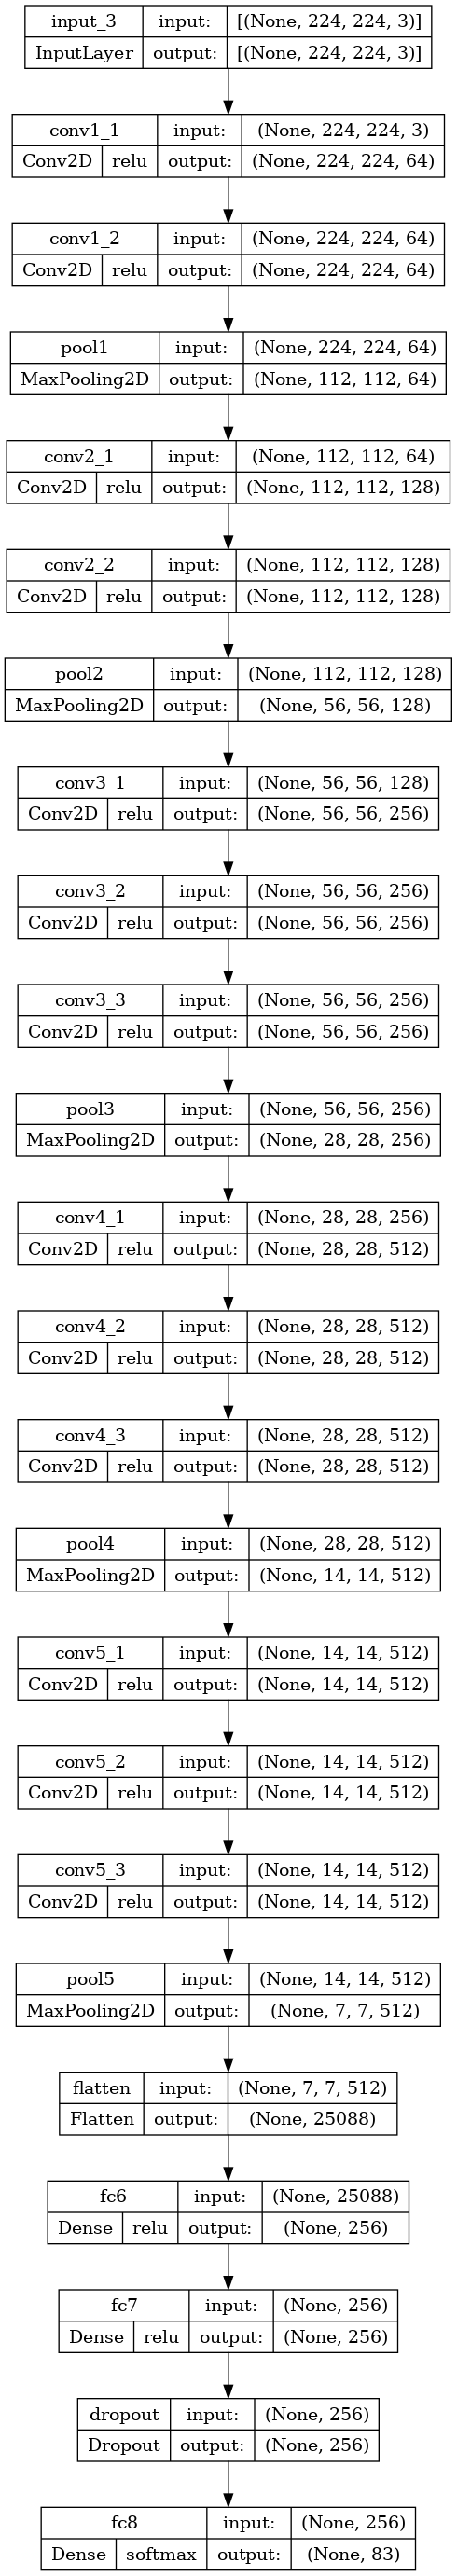

In [73]:
from tensorflow.keras.utils import plot_model
# vertical
plot_model(vggface_model, show_shapes=True, show_layer_activations=True)

In [74]:
# creates a HDF5 file
vggface_model.save('../working/'+
    'transfer_learning_trained' +
    '_face_cnn_model.h5')

# 2.4 Visualizing the training history

In [75]:
'''
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history)
'''

'\nimport pandas as pd\nimport matplotlib.pyplot as plt\n\nhistory_df = pd.DataFrame(history.history)\n'

In [76]:
'''
history_df[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Score')

history_df[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))
plt.grid(True)
plt.xlabel('Epochs')
plt.ylabel('Score')
'''

"\nhistory_df[['loss', 'val_loss']].plot(figsize=(8, 5))\nplt.grid(True)\nplt.xlabel('Epochs')\nplt.ylabel('Score')\n\nhistory_df[['accuracy', 'val_accuracy']].plot(figsize=(8, 5))\nplt.grid(True)\nplt.xlabel('Epochs')\nplt.ylabel('Score')\n"

In [77]:
# checking class balancing in the training set
#test_folder = '../input/ifsp-d3apl-2023-face-recognition/test/test/'

#dataset_df_test['class'].value_counts()

# Model evaluation

In [78]:
'''
vggface_model.evaluate(X_test, y_test)
#model.evaluate(test_batch_generator)
'''

'\nvggface_model.evaluate(X_test, y_test)\n#model.evaluate(test_batch_generator)\n'

In [79]:
'''
y_test_proba = vggface_model.predict(X_test)
#y_test_proba = model.predict(test_batch_generator)
y_test_proba
'''

'\ny_test_proba = vggface_model.predict(X_test)\n#y_test_proba = model.predict(test_batch_generator)\ny_test_proba\n'

In [80]:
'''
y_test_pred = np.argmax(y_test_proba, axis=1)
y_test_pred
'''

'\ny_test_pred = np.argmax(y_test_proba, axis=1)\ny_test_pred\n'

In [81]:
'''
from sklearn.metrics import classification_report

y_test = label_encoder.transform(dataset_df_test['class'])
class_names = label_encoder.classes_

print(classification_report(y_test, y_test_pred, target_names=[name for name in class_names]))
'''

"\nfrom sklearn.metrics import classification_report\n\ny_test = label_encoder.transform(dataset_df_test['class'])\nclass_names = label_encoder.classes_\n\nprint(classification_report(y_test, y_test_pred, target_names=[name for name in class_names]))\n"

# Generating prediciton file for submission

In [82]:
'''
#import os

# checking class balancing in the training set
test_folder = '../input/ifsp-d3apl-2023-face-recognition/test/test/'

img_test_list = sorted(os.listdir(test_folder))

img_test_full_paths = []
#img_pred_classes = []

for img_test in img_test_list:
    full_img_test_path = os.path.join(test_folder, img_test)
    img_test_full_paths.append(full_img_test_path)

# creating a dataframe to store the image full pathnames and their corresponding classes
#import pandas as pd

dataset_sub_test = pd.DataFrame({
    'image_pathname': img_test_full_paths
   })

dataset_sub_test
    
    # print()
#print(img_test_list)
'''

"\n#import os\n\n# checking class balancing in the training set\ntest_folder = '../input/ifsp-d3apl-2023-face-recognition/test/test/'\n\nimg_test_list = sorted(os.listdir(test_folder))\n\nimg_test_full_paths = []\n#img_pred_classes = []\n\nfor img_test in img_test_list:\n    full_img_test_path = os.path.join(test_folder, img_test)\n    img_test_full_paths.append(full_img_test_path)\n\n# creating a dataframe to store the image full pathnames and their corresponding classes\n#import pandas as pd\n\ndataset_sub_test = pd.DataFrame({\n    'image_pathname': img_test_full_paths\n   })\n\ndataset_sub_test\n    \n    # print()\n#print(img_test_list)\n"

In [83]:
#dataset_sub_test['image_pathname'].value_counts()

In [84]:
'''
import cv2
from sklearn.preprocessing import LabelEncoder
import numpy as np


def preprocess_faces_dataset(dataset_df, label_encoder: LabelEncoder, new_img_dims=(224, 224), verbose=0):
    # load the images as a feature matrix
    image_list = []  # list of numpy arrays
    
    for index, img_path in enumerate(dataset_df['image_pathname']):
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # image resizing
        # for gray or color images, the linear interpolation sounds good
        img = cv2.resize(img, new_img_dims, interpolation=cv2.INTER_LINEAR)        
        image_list.append(img)
        
        if verbose and (index % verbose) == 0:
            print(f'{index + 1}/{dataset_df.shape[0]} - {img_path}')
    
    # numpy array 4D: n_imgs, height, width, n_channels
    X = np.array(image_list)
    
    # feature scaling
    # numpy arary 4D with values within [0, 1]
    X = X / 255.0
    
    # encoding the classes
    # numpy array 1D with integer labels
    #y = label_encoder.transform(dataset_df['class'])
    
    return X

x_test=preprocess_faces_dataset(dataset_sub_test, label_encoder, new_img_dims=(224, 224))
x_test
'''


"\nimport cv2\nfrom sklearn.preprocessing import LabelEncoder\nimport numpy as np\n\n\ndef preprocess_faces_dataset(dataset_df, label_encoder: LabelEncoder, new_img_dims=(224, 224), verbose=0):\n    # load the images as a feature matrix\n    image_list = []  # list of numpy arrays\n    \n    for index, img_path in enumerate(dataset_df['image_pathname']):\n        img = cv2.imread(img_path)\n        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n        \n        # image resizing\n        # for gray or color images, the linear interpolation sounds good\n        img = cv2.resize(img, new_img_dims, interpolation=cv2.INTER_LINEAR)        \n        image_list.append(img)\n        \n        if verbose and (index % verbose) == 0:\n            print(f'{index + 1}/{dataset_df.shape[0]} - {img_path}')\n    \n    # numpy array 4D: n_imgs, height, width, n_channels\n    X = np.array(image_list)\n    \n    # feature scaling\n    # numpy arary 4D with values within [0, 1]\n    X = X / 255.0\n    \n    

In [85]:
'''
import os

out_dir = '../working/preprocessed'

if not os.path.exists(out_dir):
    os.makedirs(out_dir)
    
dataset_sub_test.to_csv(os.path.join(out_dir, 'sub_test.csv'), index=False)
np.save(os.path.join(out_dir, 'test_data_224x224x3.npy'), x_test)
'''

"\nimport os\n\nout_dir = '../working/preprocessed'\n\nif not os.path.exists(out_dir):\n    os.makedirs(out_dir)\n    \ndataset_sub_test.to_csv(os.path.join(out_dir, 'sub_test.csv'), index=False)\nnp.save(os.path.join(out_dir, 'test_data_224x224x3.npy'), x_test)\n"

In [86]:
#y_test_proba = vggface_model.predict(x_test)
#y_test_proba

In [87]:
#y_test_pred = np.argmax(y_test_proba, axis=1)
#y_test_pred


In [88]:
#len(y_test_pred)

In [89]:
'''
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
class_names = label_encoder.classes_

#y_test_pred = label_encoder.transform(dataset_df_test['class'])

le_fitted = le.fit_transform(class_names)

inverted = le.inverse_transform(y_test_pred)

print(inverted)
len(inverted)
'''

"\nfrom sklearn import preprocessing\n\nle = preprocessing.LabelEncoder()\nclass_names = label_encoder.classes_\n\n#y_test_pred = label_encoder.transform(dataset_df_test['class'])\n\nle_fitted = le.fit_transform(class_names)\n\ninverted = le.inverse_transform(y_test_pred)\n\nprint(inverted)\nlen(inverted)\n"

In [90]:
'''
image_id=list(range(1661))
image_id.pop(0)
len(image_id)
'''



'\nimage_id=list(range(1661))\nimage_id.pop(0)\nlen(image_id)\n'

In [91]:
'''
dataset_submission = pd.DataFrame({
    'image-id': image_id,
    'prediction': inverted
   })

dataset_submission
'''

"\ndataset_submission = pd.DataFrame({\n    'image-id': image_id,\n    'prediction': inverted\n   })\n\ndataset_submission\n"

In [92]:
#dataset_submission.to_csv('../working/prediction_400.csv', index=False)